In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from google.colab import files


uploades = files.upload()

with open("alt.atheism.txt","r",errors = "replace") as f:
  document = f.read().split('\n\n')
print(f"Loaded {len(document)} documents")

Saving alt.atheism.txt to alt.atheism (5).txt
Loaded 22360 documents


In [ ]:
tf_idf = TfidfVectorizer(stop_words='english')
X = tf_idf.fit_transform(document)

print("TF-IDF Shape:",X.shape)

TF-IDF Shape: (22360, 15746)


SVD Shape: (22360, 2)


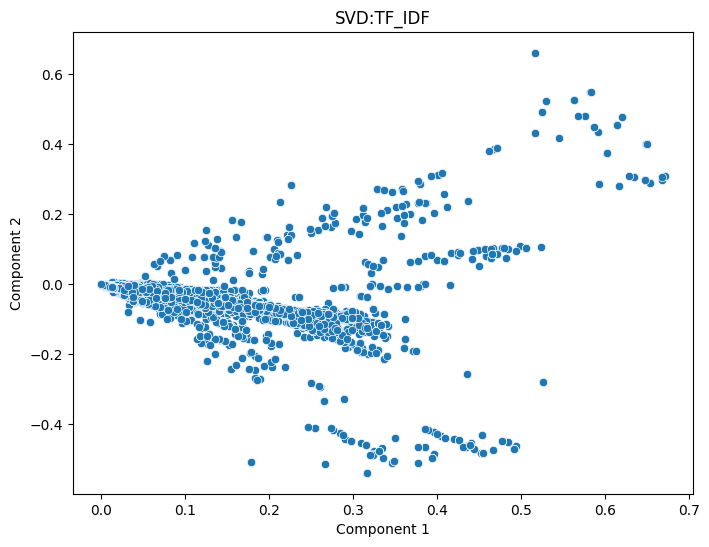

In [ ]:
SVD = TruncatedSVD(n_components = 2,random_state = 42)
X_SVD = SVD.fit_transform(X)

print("SVD Shape:",X_SVD.shape)


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_SVD[:,0],y=X_SVD[:,1])
plt.title("SVD:TF_IDF")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=42)
X_kmeans = kmeans.fit_predict(X_SVD)


score = silhouette_score(X_SVD, X_kmeans)
print("Silhouette Score :", round(score, 3))

Silhouette Score : 0.542


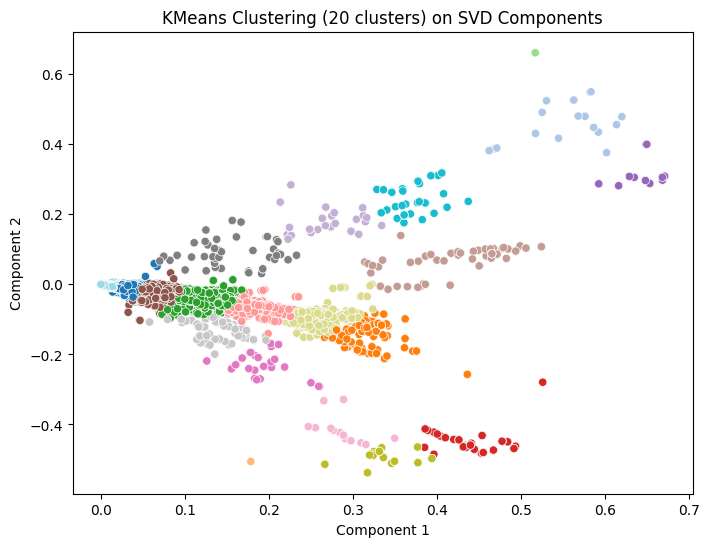

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_SVD[:, 0], y=X_SVD[:, 1], hue=X_kmeans, palette='tab20', legend=False)
plt.title("KMeans Clustering (20 clusters) on SVD Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

Why dimensionality reduction is used (mention sparsity of TF-IDF)??
Dimensionality reduction is used to make large and complex data easier to work with. TF-IDF creates a big matrix with many zero values because each document only has a few words from a large vocabulary — this is called sparsity. Dimensionality reduction removes the less important parts, keeping the main meaning while making the data smaller, faster to process, and easier to understand.

What SVD/PCA achieves??
SVD and PCA reduce the number of features in high-dimensional data (like TF-IDF), while keeping the important information.
They remove noise and redundancy, making it easier to visualize and process the data efficiently.

  How clustering helps understand the structure of data without labels??
  Clustering groups similar data points based on patterns in the data without any need of labels